## Nonlinear Sample (Example 2)

---

In [1]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from math import *
from scipy import integrate
sym.init_printing()

We have the second system of following form:
$$
x'=-x^{3}
$$
Normally, we have the following quadratization, where $y=x^2$:
$$
y' = -2x x' = -2x^4 = -2y^2
$$
Then we have the following system:
$$
\begin{cases}
y' = -2y^2\\
x' = -xy
\end{cases}
$$
However, we can see that **there is no linear part**, we can change $y=x^2+a \Rightarrow a = y - x^{2}$, then we have the following system:
$$
x' = -x^{3} = -x(y-a) = -xy +ax
$$
$$
\begin{aligned}
y' &= 2xx' = 2x(-x^3) - 2x^{4} \\
&= -2(y-a)^{2} = -2y^{2} _ 4ay - 2a^{2} \\
&= -2y^{2} + 4ay - 2a(y-x^{2})\\
&= -2y^{2} + 4ay - 2ax^{2} - 2ay \\
&= -2y^{2} + 2ax^{2} +2ay 
\end{aligned}
$$
Then we can finalize the system as following:
$$
\begin{cases}
y' = -2y^2\ + 2ax^{2} + 2ay\\
x' = -xy + ax
\end{cases}
$$

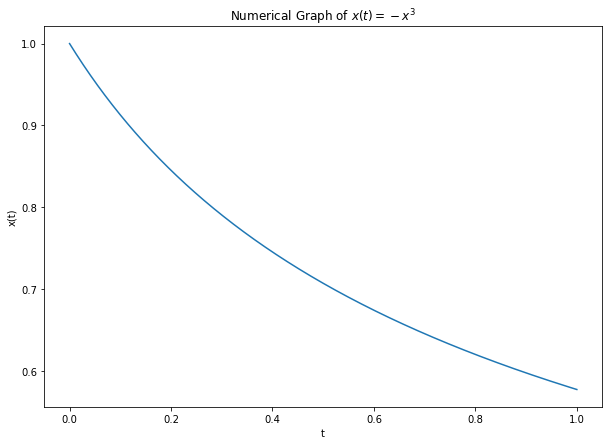

In [102]:
def dx_dt(x, t):  # 定义函数 f(y,t)
    return - x ** 3
  
x0 = 1.0  # initial condition
t = np.linspace(0, 1, 1000)  
x = integrate.odeint(dx_dt, x0, t)  # numerical solution

plt.figure(figsize=(10, 7))
plt.plot(t, x)  
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title(r'Numerical Graph of $x(t) = -x^3$')
plt.show() 

d            3   
──(x(t)) = -x (t)
dt               

⎡               ________                 ________⎤
⎢              ╱  -1                    ╱  -1    ⎥
⎢       -√2⋅  ╱  ──────           √2⋅  ╱  ────── ⎥
⎢           ╲╱   C₁ - t              ╲╱   C₁ - t ⎥
⎢x(t) = ─────────────────, x(t) = ───────────────⎥
⎣               2                        2       ⎦

----------------- The first equation (right hands) -----------------


        ________ 
       ╱  -1     
-√2⋅  ╱  ──────  
    ╲╱   C₁ - t  
─────────────────
        2        

----------------- The second equation (right hands) -----------------


       ________
      ╱  -1    
√2⋅  ╱  ────── 
   ╲╱   C₁ - t 
───────────────
       2       

       _______
      ╱  -1   
√2⋅  ╱  ───── 
   ╲╱   1 - t 
──────────────
      2       

<lambdifygenerated-57>:2: RuntimeWarning: divide by zero encountered in true_divide
  return (1/2)*sqrt(2)*sqrt(-1/(1 - t))
<lambdifygenerated-57>:2: RuntimeWarning: invalid value encountered in sqrt
  return (1/2)*sqrt(2)*sqrt(-1/(1 - t))


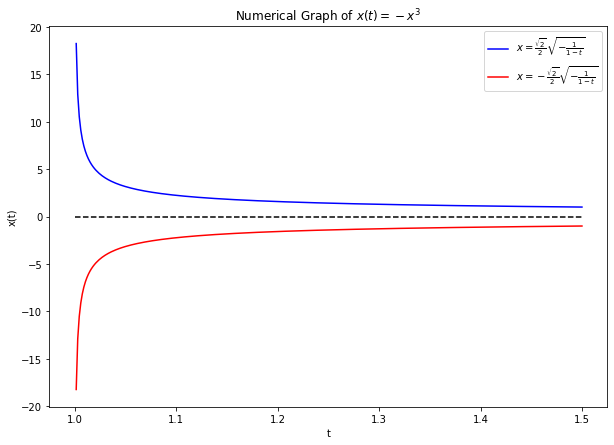

In [103]:
t = sym.Symbol('t')
x = sym.Function('x')(t)

# Define the system of ODEs
eq1 = sym.Eq(x.diff(t), -x**3)
display(eq1)
sol = sym.dsolve(eq1)

display(sol)
print('----------------- The first equation (right hands) -----------------')
display(sol[0].rhs)
print('----------------- The second equation (right hands) -----------------')
display(sol[1].rhs)

# plot the solution
expr = sol[1].rhs
C1 = sym.Symbol('C1')
expr_init = expr.subs(C1, 1)
display(expr_init)

# convert the expression to a function that can be used with numpy arrays
expr_init_func = sym.lambdify(t, expr_init, 'numpy')

# plot the graph of expr_init
t_vals = np.linspace(0, 1.5, 1000)
x_vals = expr_init_func(t_vals)

plt.figure(figsize=(10, 7))
plt.title(r'Numerical Graph of $x(t) = -x^3$')
plt.plot(t_vals, x_vals, 'b-', label=r'$x = \frac{\sqrt{2}}{2} \sqrt{-\frac{1}{1-t}}$')
plt.plot(t_vals, -x_vals, 'r-', label=r'$x = - \frac{\sqrt{2}}{2} \sqrt{-\frac{1}{1-t}}$')
plt.plot([1.0, 1.5], [0, 0], 'k--')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.legend(loc='best')
plt.show()

### Solving the equation $x' = -x^{3}$

---

We can solve it by seperating the variables, then we have the following equation:
$$
x'(t) = -x(t)^3
$$
divided by $x(t)^3$, we have:
$$
\frac{1}{x(t)^3} \frac{dx}{dt} = -1
$$
Then we take integral on both sides:
$$
\int \frac{1}{x(t)^3} dx = \int -1 dt
$$
Then we get:
$$
-\frac{1}{2x^{2}} + C= -t 
$$
Finally, we get:
$$
x= \pm \sqrt{\frac{1}{2 C+2 t}} = \pm \frac{\sqrt{2}}{2} \sqrt{\frac{1}{C+ t}}
$$

### Compute the SVD decomposition of $F_2$

---

In [34]:
# Define symbol
a = sym.Symbol('a')

# Define matrix A
a = 3
A = np.array([[0, -1, 0, 0], [-2*a, 0, 0, 2]])
A_AT = A @ A.T
AT_A = A.T @ A
display(A_AT)
display(AT_A)

eigenvalue1, eigenvector1 = np.linalg.eig(A_AT)
eigenvalue2, eigenvector2 = np.linalg.eig(AT_A)

print('----------------- The eigenvalues of AAT -----------------')
display(eigenvalue1)
print('----------------- The eigenvectors of AAT -----------------')
display(eigenvector1)
print('----------------- The eigenvalues of ATA -----------------')
display(eigenvalue2)
print('----------------- The eigenvectors of ATA -----------------')
display(eigenvector2)




array([[ 1,  0],
       [ 0, 40]])

array([[ 36,   0,   0, -12],
       [  0,   1,   0,   0],
       [  0,   0,   0,   0],
       [-12,   0,   0,   4]])

----------------- The eigenvalues of AAT -----------------


array([ 1., 40.])

----------------- The eigenvectors of AAT -----------------


array([[1., 0.],
       [0., 1.]])

----------------- The eigenvalues of ATA -----------------


array([40.,  0.,  1.,  0.])

----------------- The eigenvectors of ATA -----------------


array([[ 0.9486833 ,  0.31622777,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [-0.31622777,  0.9486833 ,  0.        ,  0.        ]])

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def f(x0, a):
    return 2*np.sqrt(1+1/a**2)*np.sqrt((x0**2-a)**2+x0**2)

x0_vals = np.linspace(0.1, 10, 1000)
a_vals = np.linspace(0.1, 10, 1000)

result = np.zeros((len(x0_vals), len(a_vals)))
for i in range(len(x0_vals)):
    for j in range(len(a_vals)):
        result[i, j] = f(x0_vals[i], a_vals[j])
        
min_value = np.min(result)
print(min_value)
print(np.where(result == min_value))
print(f(0.05, 0.2354))



2.1350139992109756
(array([0]), array([20]))
2.0791636723276596


In [1]:
import scipy.optimize as scopt
import numpy as np
import pylab as pl
from ipywidgets import *
import matplotlib.pyplot as plt

$$
\begin{aligned}
R & :=\frac{\left\|X_0\right\|\left\|F_2\right\|}{\left|\Re\left(\lambda_1\right)\right|} \\
& =\frac{2 \sqrt{a^2+1} \sqrt{x_0^4+(1-2 a) x_0^2+a^2}}{a} \\
& =2 \sqrt{1+\frac{1}{a^2}} \sqrt{\left(x_0^2-a\right)^2+x_0^2} \\
& <1
\end{aligned}
$$

In [2]:
def J(x):
    return 2 * np.sqrt(1 + 1/ x[0] ** 2) * np.sqrt((x[1] ** 2 - x[0]) ** 2 + x[1] ** 2)

def GradJ(x):
    return np.array([2 * (x[1] ** 2 - x[0]) / np.sqrt((x[1] ** 2 - x[0]) ** 2 + x[1] ** 2) / np.sqrt(1 + 1 / x[0] ** 2), 2 * x[1] / np.sqrt((x[1] ** 2 - x[0]) ** 2 + x[1] ** 2) / np.sqrt(1 + 1 / x[0] ** 2) + 2 * np.sqrt(1 + 1 / x[0] ** 2) * (x[1] ** 2 - x[0]) / np.sqrt((x[1] ** 2 - x[0]) ** 2 + x[1] ** 2) ** 2])

   1    0.366497    1.226260    9.720131
   2    0.175407    0.055296    2.095310


<Figure size 432x288 with 0 Axes>

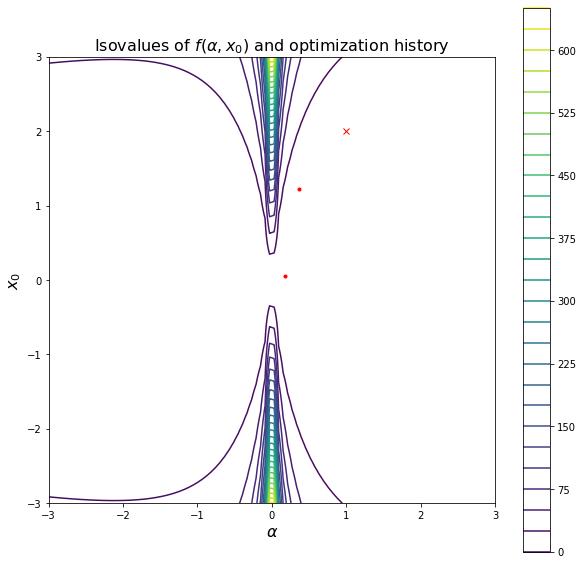

Details regarding the result of the optimization:
  message: ABNORMAL_TERMINATION_IN_LNSRCH
  success: False
   status: 2
      fun: 2.095310268721528
        x: [ 1.754e-01  5.530e-02]
      nit: 2
      jac: [-3.290e-01 -6.079e+01]
     nfev: 55
     njev: 55
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
--------------------------------------------------
Number of function evaluations:  3
--------------------------------------------------
End point of the optimization:  [0.17540719 0.05529612]


In [20]:
Nfeval = 1
x0 = np.array([1, 2])
xs = []
ys = []

def callbackF(Xi):
    global Nfeval
    print('{0:4d}   {1: 3.6f}   {2: 3.6f}   {3: 3.6f}'.format(
        Nfeval, Xi[0], Xi[1], J(Xi)))
    xs.append(Xi[0])
    ys.append(Xi[1])
    Nfeval += 1

Result = scopt.minimize(
    J, x0, jac=GradJ, callback=callbackF, method='L-BFGS-B', tol=1e-15)

# plot the optimization history
def plot_function():
    plt.figure()
    plt.figure(figsize=(10, 10))
    xmin = min(-2, x0[0])-1
    xmax = max(2, x0[0])+1
    ymin = min(-2, x0[1])-1
    ymax = max(2, x0[1])+1
    aX0 = np.linspace(xmin, xmax, 100)
    aX1 = np.linspace(ymin, ymax, 100)
    Z = np.array([[J(np.array([x0, x1])) for x0 in aX0] for x1 in aX1])
    plt.contour(aX0, aX1, Z, 25)  # (np.linspace(0,30,10)**2))
    plt.plot(x0[0], x0[1], 'rx')
    plt.axis('scaled')
    plt.colorbar()
    plt.xlabel(r'$\alpha$', size=16)
    plt.ylabel(r'$x_0$', size=16)
    plt.title(r'Isovalues of $f(\alpha,x_0)$ and optimization history', size=16)

    plt.plot(xs, ys, '.r')
    plt.show()

plot_function()

print("Details regarding the result of the optimization:")
print(Result)
print('-'*50)
print("Number of function evaluations: ", Nfeval)
print('-'*50)
print('End point of the optimization: ', Result.x)

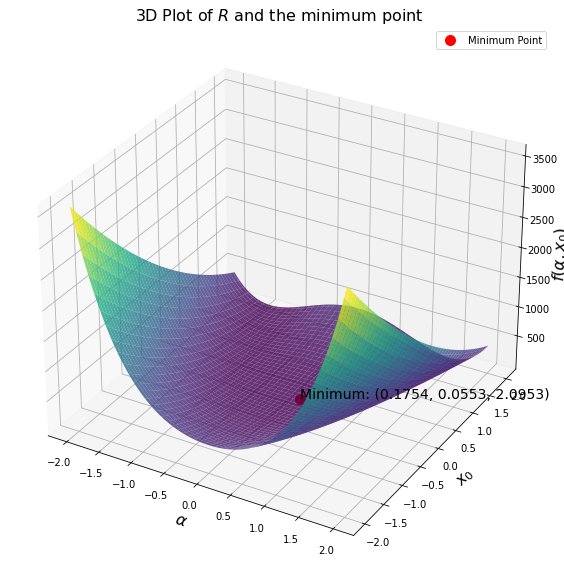

In [26]:
from mpl_toolkits.mplot3d import Axes3D

# define the function to plot
def J_3D(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

# create a 3D plot of the function
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)
Z = J_3D(X, Y)

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.set_xlabel(r'$\alpha$', size=16)
ax.set_ylabel(r'$x_0$', size=16)
ax.set_zlabel(r'$f(\alpha,x_0)$', size=16)
ax.set_title(r'3D Plot of $R$ and the minimum point', size=16)

# plot the minimum point
ax.plot([Result.x[0]], [Result.x[1]], [Result.fun], 'ro', markersize=10, label='Minimum Point')
ax.text(Result.x[0], Result.x[1], Result.fun+10, 'Minimum: ({:.4f}, {:.4f}, {:.4f})'.format(Result.x[0], Result.x[1], Result.fun), color='black', size=14)

plt.legend()
plt.show()


